# Jain Real Estate - House Price Prediction

In [1]:
#importing libraries

import pandas as pd
import numpy as np

In [2]:
house=pd.read_csv('data.csv')

In [3]:
#     1. CRIM      per capita crime rate by town
#     2. ZN        proportion of residential land zoned for lots over 
#                  25,000 sq.ft.
#     3. INDUS     proportion of non-retail business acres per town
#     4. CHAS      Charles River dummy variable (= 1 if tract bounds 
#                  river; 0 otherwise)
#     5. NOX       nitric oxides concentration (parts per 10 million)
#     6. RM        average number of rooms per dwelling
#     7. AGE       proportion of owner-occupied units built prior to 1940
#     8. DIS       weighted distances to five Boston employment centres
#     9. RAD       index of accessibility to radial highways
#     10. TAX      full-value property-tax rate per $10,000
#     11. PTRATIO  pupil-teacher ratio by town
#     12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
#                  by town
#     13. LSTAT    % lower status of the population
#     14. MEDV     Median value of owner-occupied homes in $1000's


In [4]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
house.shape

(506, 14)

In [6]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.295556,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.697106,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.888250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.629750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       498 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# Exploring the columns

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

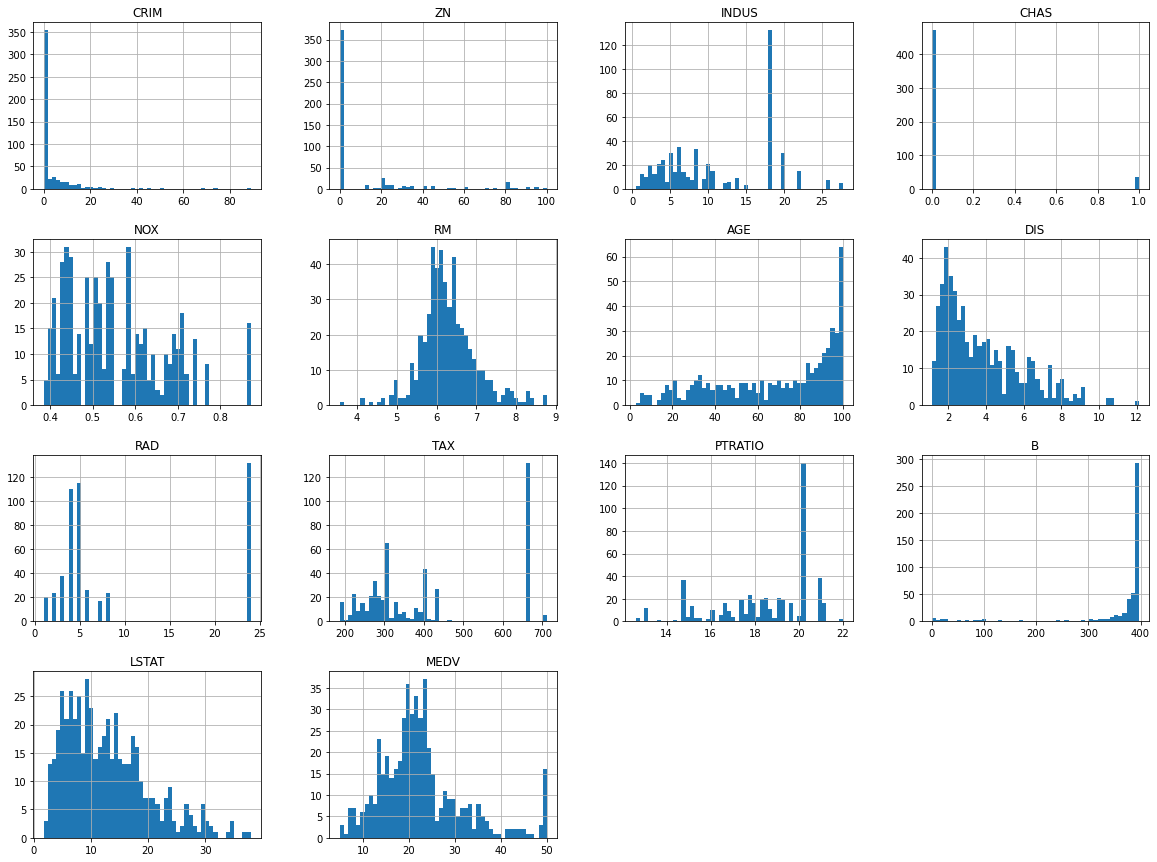

In [10]:
house.hist(bins=50, figsize=(20,15))
plt.show()

### spliting data: Train-Test

In [11]:
def train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_data=np.random.permutation(len(data))
#     print(shuffled_data)
    test_size=int(len(data)*test_ratio)
    test_indices = shuffled_data[:test_size]
    train_indices = shuffled_data[test_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
# train_set, test_set= train_test(house, 0.2)

In [13]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_set, test_set=train_test_split(house, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [16]:
# stratified shuffled sampling
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(house, house['CHAS']):
    strs_train_set=house.loc[train_index]
    strs_test_set=house.loc[test_index]
    


In [17]:
strs_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [18]:
strs_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [19]:
#ratio of 0&1 in strs_train_set and strs_test_set
a=376/28
b=95/7
print(a)
print(b)


13.428571428571429
13.571428571428571


In [20]:
house=strs_train_set.copy()

## Looking for Correlations

In [21]:
corr_matrix=house.corr()
#pearson correlations
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.690027
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

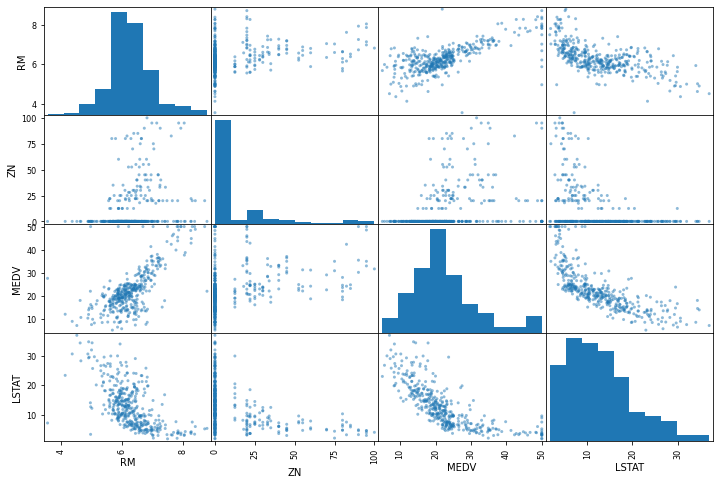

In [22]:
from pandas.plotting import scatter_matrix
attr=["RM","ZN","MEDV","LSTAT"]
scatter_matrix(house[attr],figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

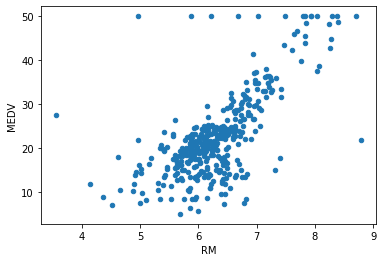

In [23]:
house.plot(kind="scatter",x='RM',y="MEDV", alpha=1)

## Attribute combinations 

In [24]:
house["Tax_per_RM"]=house['TAX']/house['RM']
house["Tax_per_RM"].head()

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
Name: Tax_per_RM, dtype: float64

In [25]:
corr_matrix=house.corr()
#pearson correlations
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV          1.000000
RM            0.690027
B             0.361761
ZN            0.339741
DIS           0.240451
CHAS          0.205066
AGE          -0.364596
RAD          -0.374693
CRIM         -0.393715
NOX          -0.422873
TAX          -0.456657
INDUS        -0.473516
PTRATIO      -0.493534
Tax_per_RM   -0.534273
LSTAT        -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='Tax_per_RM', ylabel='MEDV'>

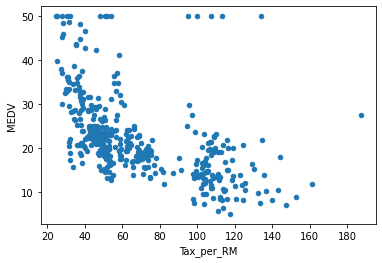

In [26]:
house.plot(kind="scatter",x='Tax_per_RM',y="MEDV", alpha=1)

In [27]:
#seperate features and attributes
house=strs_train_set.drop("MEDV",axis=1)
house_labels=strs_train_set["MEDV"].copy()

 ## Handling Missing values

In [28]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,398.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.291523,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.705217,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.884250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.634000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [29]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(house)

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21750e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [31]:
imputer.statistics_.shape

(13,)

In [32]:
x=imputer.transform(house)
house_new=pd.DataFrame(x,columns=house.columns)


In [33]:
house_new.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.290423,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.700005,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.887250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Creating Pipeline

Pipeline in ML operates by enabling a sequence of data to be transformed and correlated together in a model that can be tested and evaluated to achieve an outcome, whether positive or negative.It consist of several steps to train a model
Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.
 

In [34]:
from sklearn.pipeline import Pipeline


In [35]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
pipline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])

In [36]:
house_num=pipline.fit_transform(house)
house_num.shape

(404, 13)

## Desired Model

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(house_num,house_labels)

RandomForestRegressor()

In [38]:
new_data=house.iloc[:5]

In [39]:
new_labels=house_labels.iloc[:5]

In [40]:
prepared_data=pipline.transform(new_data)

In [41]:
model.predict(prepared_data)

array([22.344, 25.412, 16.623, 23.377, 23.544])

In [42]:
list(new_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the model

In [43]:
from sklearn.metrics import mean_squared_error

housing_prediction=model.predict(house_num)
mse=mean_squared_error(house_labels,housing_prediction)
rmse= np.sqrt(mse)
rmse

1.2457387942760536

## Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, house_num,house_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)


In [45]:
rmse_scores

array([2.90674694, 2.84631628, 4.43407189, 2.66555954, 3.33182147,
       2.57257376, 4.9255919 , 3.38643144, 3.09246771, 3.2875258 ])

In [46]:
def print_scores(scores):
    print("Scores :",scores)
    print("Mean :",scores.mean())
    print("Standard deviation :",scores.std())
    

In [47]:
print_scores(rmse_scores)

Scores : [2.90674694 2.84631628 4.43407189 2.66555954 3.33182147 2.57257376
 4.9255919  3.38643144 3.09246771 3.2875258 ]
Mean : 3.3449106738361665
Standard deviation : 0.7247307883492123


## Saving Model

In [48]:
from joblib import dump, load
dump(model, 'Estates.joblib') 

['Estates.joblib']

## Testing the model on test data

In [49]:
X_test = strs_test_set.drop("MEDV", axis=1)
Y_test = strs_test_set["MEDV"].copy()
X_test_prepared = pipline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [50]:
final_rmse

2.8888616914883656

In [51]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.26092577, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])